In [ ]:
# Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Core libraries
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow and Keras for building the neural network
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras import layers

Objective 1: Convolutional Neural Network. Optimized for image data

Training images: (60000, 28, 28)
Training labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)


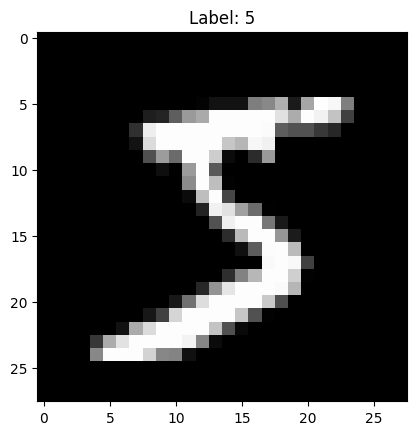

In [ ]:
# Load the MNIST dataset directly from Keras
# It automatically splits into training (60,000 images) and test (10,000 images)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Print the shapes to understand the data structure
print("Training images:", x_train.shape)
print("Training labels:", y_train.shape)
print("Test images:", x_test.shape)
print("Test labels:", y_test.shape)

# Display the first example image
plt.imshow(x_train[0], cmap="gray")  # grayscale visualization
plt.title(f"Label: {y_train[0]}")
plt.show()

In [ ]:
# Convert pixel values from integers (0–255) to floats (0–1)
# This normalization helps the model train more effectively
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# CNNs expect 4D input: (samples, height, width, channels)
# Our data is (60000, 28, 28) — we add a channel dimension of 1 (grayscale)
x_train = np.expand_dims(x_train, -1)  # becomes (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)    # becomes (10000, 28, 28, 1)

# One-hot encode the labels
# Instead of numbers 0-9, we convert them to vectors like [0,0,0,1,0,0,0,0,0,0]
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
# Define a Sequential model — a linear stack of layers
model = keras.Sequential([
    # Convolution layer: 32 filters, each 3x3 pixels
    # This layer learns simple patterns like edges
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),

    # Pooling layer: reduces size (28x28 → 14x14) while keeping important info
    layers.MaxPooling2D((2,2)),

    # Another convolution: deeper features (e.g., curves, loops)
    layers.Conv2D(64, (3,3), activation='relu'),

    # Another pooling: further reduce size (14x14 → 7x7)
    layers.MaxPooling2D((2,2)),

    # Flatten: turn 2D feature maps into a 1D vector for the dense layers
    layers.Flatten(),

    # Dense layer: learns complex combinations of features
    layers.Dense(64, activation='relu'),

    # Output layer: 10 neurons for 10 digit classes (0–9)
    # 'softmax' turns outputs into probabilities that sum to 1
    layers.Dense(10, activation='softmax')
])

# Print a summary of the architecture
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the CNN using the training data
# validation_split=0.2 uses 20% of training data to validate performance each epoch
history = model.fit(
    x_train, y_train,
    epochs=5,           # You can increase this to 10 or more for better accuracy
    batch_size=64,      # How many images per gradient update
    validation_split=0.2
)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8497 - loss: 0.4910 - val_accuracy: 0.9807 - val_loss: 0.0662
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9792 - loss: 0.0675 - val_accuracy: 0.9860 - val_loss: 0.0483
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9860 - loss: 0.0448 - val_accuracy: 0.9869 - val_loss: 0.0449
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9900 - loss: 0.0295 - val_accuracy: 0.9870 - val_loss: 0.0432
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9915 - loss: 0.0254 - val_accuracy: 0.9876 - val_loss: 0.0435


In [ ]:
# Test the trained model on new data it has never seen
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9860 - loss: 0.0426
Test accuracy: 98.85%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


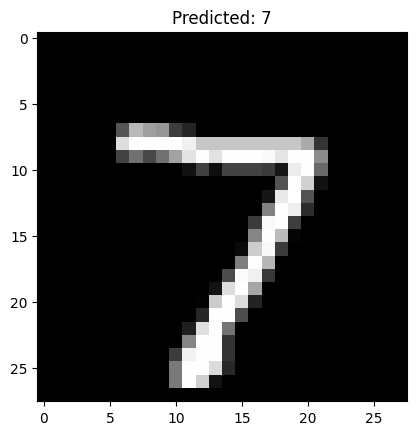

In [ ]:
# Predict on one image
predictions = model.predict(x_test)

# Get the index of the highest probability → the predicted digit
predicted_label = np.argmax(predictions[0])

# Show the image with the prediction
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.show()

In [ ]:
# Save
model.save("/content/digit_cnn.h5")

# Load later
loaded_model = keras.models.load_model("/content/digit_cnn.h5")

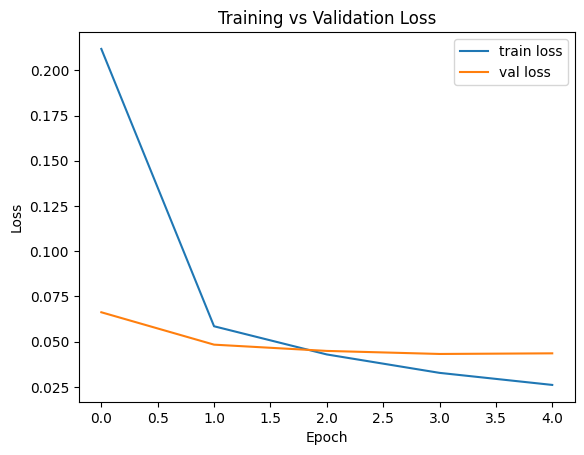

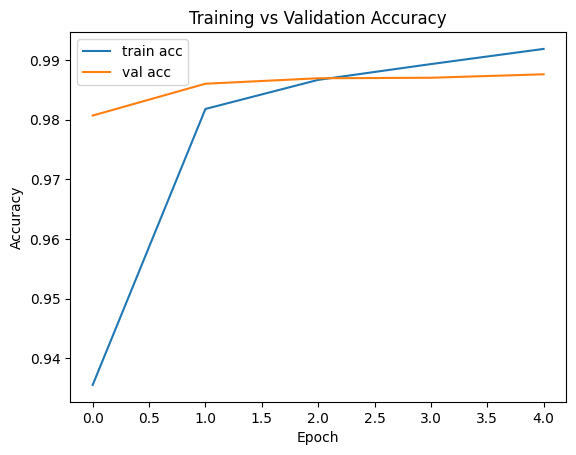

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.show()

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!jupyter nbconvert --to html '/content/drive/MyDrive/HNR499/HNR499_Model1'

Mounted at /content/drive
[NbConvertApp] Converting notebook /content/drive/MyDrive/HNR499/HNR499_Model1 to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 400422 bytes to /content/drive/MyDrive/HNR499/HNR499_Model.html
